## Pumpkin Varieties and Color

Load up required libraries and dataset. Convert the data to a dataframe containing a subset of the data: 

Let's look at the relationship between color and variety

In [2]:
import pandas as pd
import numpy as np

full_pumpkins = pd.read_csv('../data/US-pumpkins.csv')

full_pumpkins.head()

,City Name,Type,Package,Variety,Sub Variety,Grade,Date,Low Price,High Price,Mostly Low,...,Unit of Sale,Quality,Condition,Appearance,Storage,Crop,Repack,Trans Mode,Unnamed: 24,Unnamed: 25
0,BALTIMORE,NaN,24 inch bins,NaN,NaN,NaN,4/29/17,270.0,280.0,270.0,...,NaN,NaN,NaN,NaN,NaN,NaN,E,NaN,NaN,NaN
1,BALTIMORE,NaN,24 inch bins,NaN,NaN,NaN,5/6/17,270.0,280.0,270.0,...,NaN,NaN,NaN,NaN,NaN,NaN,E,NaN,NaN,NaN
2,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,9/24/16,160.0,160.0,160.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
3,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,9/24/16,160.0,160.0,160.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
4,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,11/5/16,90.0,100.0,90.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN


In [3]:
column_to_select = ['City Name','Package','Variety', 'Origin','Item Size', 'Color']
pumpkins = full_pumpkins.loc[:, column_to_select]
pumpkins.dropna(inplace=True)
pumpkins.info()

<class 'pandas.core.frame.DataFrame'>
Index: 991 entries, 2 to 1698
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   City Name  991 non-null    object
 1   Package    991 non-null    object
 2   Variety    991 non-null    object
 3   Origin     991 non-null    object
 4   Item Size  991 non-null    object
 5   Color      991 non-null    object
dtypes: object(6)
memory usage: 54.2+ KB


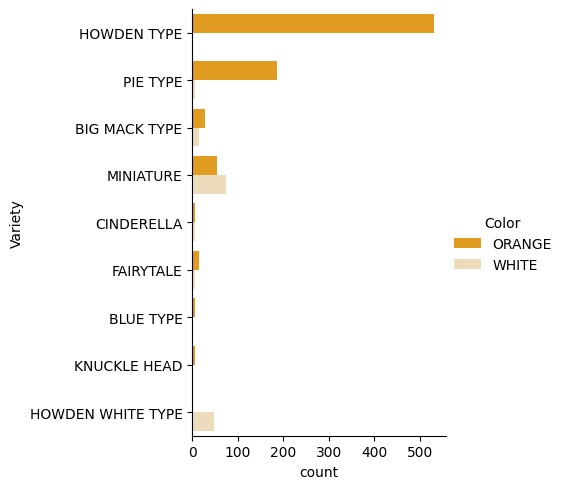

In [7]:
import seaborn as sns
palette = {
'ORANGE': 'orange',
'WHITE': 'wheat',
}
sns.catplot(
    data=pumpkins, y = 'Variety', hue='Color', kind='count', palette=palette
)

In [11]:
from sklearn.preprocessing import OrdinalEncoder
item_size_encoder = [['sml', 'med', 'med-lge', 'lge', 'xlge', 'jbo', 'exjbo']]
ordinal_featre = ['Item Size']
ordinal_encoder = OrdinalEncoder(categories=item_size_encoder)
print(ordinal_encoder)

OrdinalEncoder(categories=[['sml', 'med', 'med-lge', 'lge', 'xlge', 'jbo',
                            'exjbo']])


In [12]:
from sklearn.preprocessing import OneHotEncoder
categorical_features = ['City Name', 'Package', 'Variety', 'Origin']
categorical_encoder = OneHotEncoder(sparse_output=False)


In [ ]:
from sklearn.compose import ColumnTransformer
ct = ColumnTransformer([
    ('ord', ordinal_encoder, ordinal_featre),
    ('cat', categorical_encoder, categorical_features)
])
ct.set_output(transform='pandas')
encoded_features = ct.fit_transform(pumpkins)

In [20]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
encoded_label = label_encoder.fit_transform(pumpkins['Color'])


In [26]:
encoded_pumpkins = encoded_features.assign(color=encoded_label)
print(encoded_pumpkins.columns)

Index(['ord__Item Size', 'cat__City Name_ATLANTA', 'cat__City Name_BALTIMORE',
       'cat__City Name_BOSTON', 'cat__City Name_CHICAGO',
       'cat__City Name_COLUMBIA', 'cat__City Name_DALLAS',
       'cat__City Name_DETROIT', 'cat__City Name_LOS ANGELES',
       'cat__City Name_MIAMI', 'cat__City Name_NEW YORK',
       'cat__City Name_PHILADELPHIA', 'cat__City Name_SAN FRANCISCO',
       'cat__City Name_ST. LOUIS', 'cat__Package_1 1/9 bushel cartons',
       'cat__Package_1 1/9 bushel crates', 'cat__Package_1/2 bushel cartons',
       'cat__Package_24 inch bins', 'cat__Package_36 inch bins',
       'cat__Package_bins', 'cat__Package_bushel cartons',
       'cat__Variety_BIG MACK TYPE', 'cat__Variety_BLUE TYPE',
       'cat__Variety_CINDERELLA', 'cat__Variety_FAIRYTALE',
       'cat__Variety_HOWDEN TYPE', 'cat__Variety_HOWDEN WHITE TYPE',
       'cat__Variety_KNUCKLE HEAD', 'cat__Variety_MINIATURE',
       'cat__Variety_PIE TYPE', 'cat__Origin_ALABAMA',
       'cat__Origin_CALIFORNIA

C:\Users\Paskal Sunari\AppData\Local\Temp\ipykernel_19800\1586007565.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  g = sns.catplot(


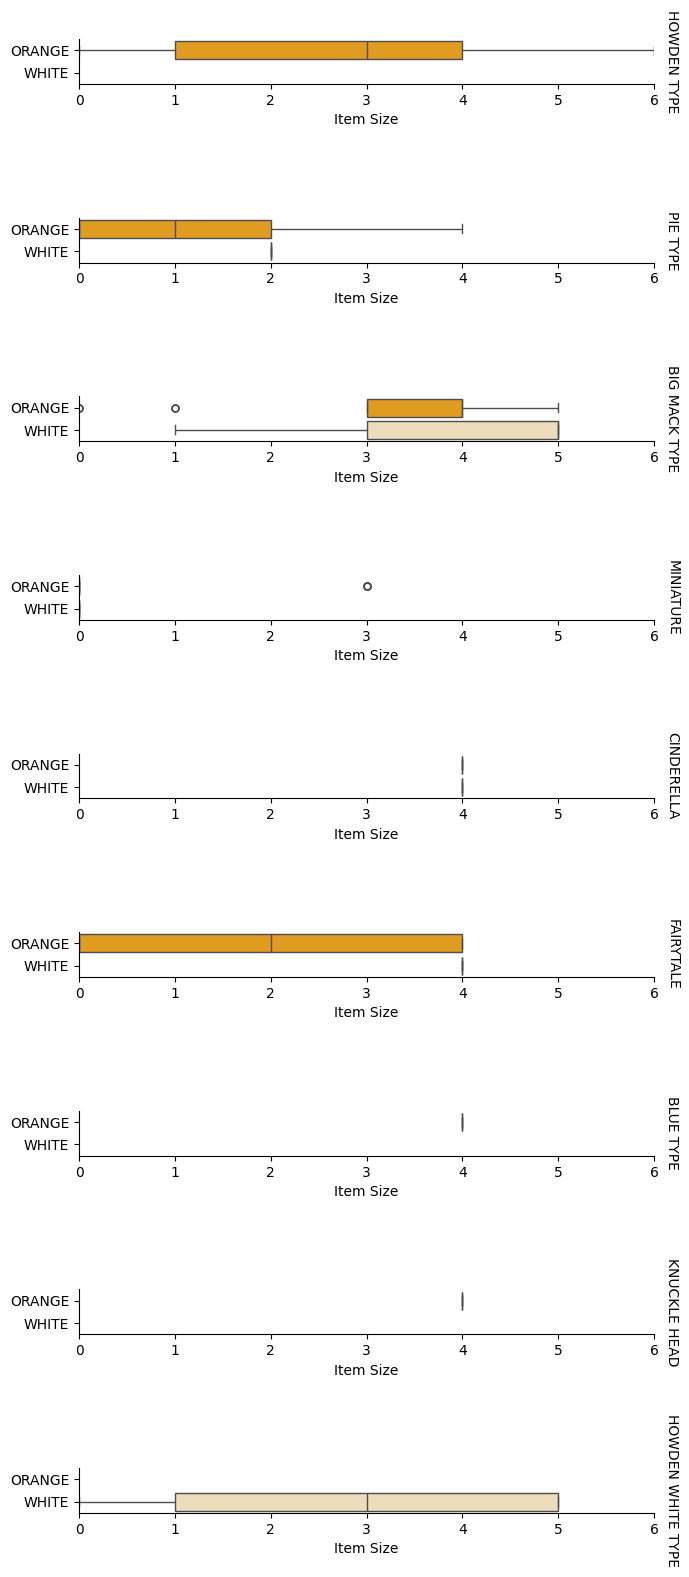

In [27]:
pallette = {
     'ORANGE': 'orange',
    'WHITE': 'wheat',
}
pumpkins['Item Size'] = encoded_pumpkins['ord__Item Size']
g = sns.catplot(
    data = pumpkins,
    x = 'Item Size',
    y = 'Color',
    row = 'Variety',
    kind = 'box',
    orient = 'h',
    sharex=False,
    margin_titles=True,
    height=1.8,
    aspect=4,
    palette=pallette
)
g.set(xlabel='Item Size', ylabel='').set(xlim=(0, 6))
g.set_titles(row_template='{row_name}')

C:\Users\Paskal Sunari\AppData\Local\Temp\ipykernel_19800\2511937648.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(x="color", y="ord__Item Size", data=encoded_pumpkins, palette=palette)
d:\AI\MachineLearning\ML-For-Beginners\.venv\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 63.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
d:\AI\MachineLearning\ML-For-Beginners\.venv\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 21.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<Axes: xlabel='color', ylabel='ord__Item Size'>

d:\AI\MachineLearning\ML-For-Beginners\.venv\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 79.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
d:\AI\MachineLearning\ML-For-Beginners\.venv\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 35.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


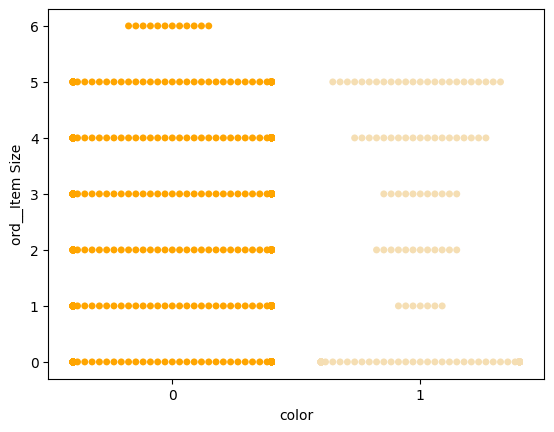

In [31]:
palette = {
'0': 'orange',
'1': 'wheat'
}
sns.swarmplot(x="color", y="ord__Item Size", data=encoded_pumpkins, palette=palette)

In [33]:
from sklearn.model_selection import train_test_split

X = encoded_pumpkins[encoded_pumpkins.columns.difference(['Color'])]
y = encoded_pumpkins['color']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [34]:
from sklearn.metrics import f1_score, classification_report 
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

print(classification_report(y_test, predictions))
print('Predicted labels: ', predictions)
print('F1-score: ', f1_score(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       166
           1       1.00      1.00      1.00        33

    accuracy                           1.00       199
   macro avg       1.00      1.00      1.00       199
weighted avg       1.00      1.00      1.00       199

Predicted labels:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0
 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1
 0 1 0 1 0 0 0 0 0 1 0 0 1 1]
F1-score:  1.0


In [35]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions)

array([[166,   0],
       [  0,  33]])

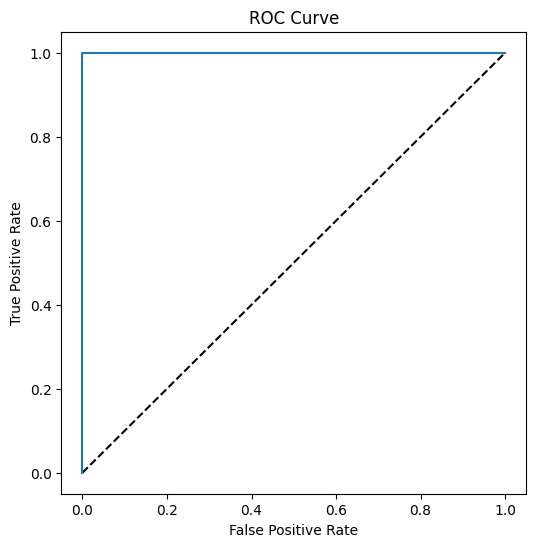

In [36]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

y_scores = model.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_scores[:,1])

fig = plt.figure(figsize=(6, 6))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [37]:
auc = roc_auc_score(y_test,y_scores[:,1])
print(auc)

1.0
